# PCCP.C1 Plots

[Click here](https://www.arm.gov/capabilities/vaps/pccp) for more information about this vap.

In [1]:
%matplotlib widget
import ipywidgets as widgets

import matplotlib.pyplot as plt
import ipywidgets as widgets
import numpy as np
import pandas as pd
import os
from datetime import datetime

import act
import xarray as xr

# Data archive directory
DATA_DIR = r'/data/archive/'

# Datastream info
DATASTREAM_NAME = 'pccp'
DATA_LEVEL = 'c1'
LOCATIONS = [{'end_date': '2022-09-26', 'facility': 'S5', 'site': 'hou', 'start_date': '2021-09-17'}, {'end_date': '2020-03-03', 'facility': 'E43', 'site': 'sgp', 'start_date': '2017-09-01'}, {'end_date': '2019-12-01', 'facility': 'E44', 'site': 'sgp', 'start_date': '2017-09-01'}, {'end_date': '2019-10-30', 'facility': 'E45', 'site': 'sgp', 'start_date': '2017-09-01'}]

## Define site, facility, and date range

In [2]:
print("The following locations and date ranges are available for this VAP:")
display(pd.DataFrame(LOCATIONS, columns=['site', 'facility', 'start_date', 'end_date']))

The following locations and date ranges are available for this VAP:


,site,facility,start_date,end_date
0,hou,S5,2021-09-17,2022-09-26
1,sgp,E43,2017-09-01,2020-03-03
2,sgp,E44,2017-09-01,2019-12-01
3,sgp,E45,2017-09-01,2019-10-30


#### Define site, facility, and date range (date format: YYYY-MM-DD) using the variables below:

In [3]:
site_facility = ( 'sgp', 'E43' )

date_start = '2020-03-02'
date_end = '2020-03-03'

## Load data files
Load data files from /data/archive/

In [4]:
# Compile list of files
site, facility = site_facility
d_date_start = datetime.strptime(date_start, '%Y-%m-%d')
d_date_end = datetime.strptime(date_end, '%Y-%m-%d')
dir_path = os.path.join(DATA_DIR + site, site + DATASTREAM_NAME + facility + r'.' + DATA_LEVEL )
dir_path


'/data/archive/sgp/sgppccpE43.c1'

In [5]:
from datetime import date, timedelta
import pandas as pd

def get_ARM_formated_dates(start_date, end_date):
    """
    Get a list of ARM conventional formated date lists, based on start_date and end_date(inclusive)
    EXAMPLE:
    get_ARM_formated_dates(start_date="20180219", end_date="20180221")
    >> ["20180219", "20180220", "20180221"] 
    """
    
    _start_date = pd.to_datetime(start_date)
    _end_date = pd.to_datetime(end_date)
    
    delta = _end_date - _start_date   # returns timedelta    
    dates = []

    for i in range(delta.days + 1):
        day = _start_date + timedelta(days=i)
        day_formated = day.strftime(format="%Y%m%d")
        dates.append(day_formated)
    return dates


get_ARM_formated_dates(start_date=date_start, end_date=date_end)

['20200302', '20200303']

In [6]:
# Filter a list of files based on date pattern
import glob
dates = get_ARM_formated_dates(start_date=date_start, end_date=date_end)
files_filter = []
for date in dates:
    files_filter += glob.glob(f'{dir_path}/*.{date}*.*')
    files_filter
files_filter

['/data/archive/sgp/sgppccpE43.c1/sgppccpE43.c1.20200302.140020.nc',
 '/data/archive/sgp/sgppccpE43.c1/sgppccpE43.c1.20200303.140000.nc']

In [7]:
# Load files as a single dataset
files_list = files_filter 
ds = act.io.armfiles.read_netcdf(files_list)
ds.clean.cleanup()
print(f'{len(files_list)} files loaded')
ds


/tmp/ipykernel_1869/3004971396.py:3: DeprecationWarning: act.io.armfiles.read_netcdf will be replaced in version 2.0.0 by act.io.arm.read_arm_netcdf()
  ds = act.io.armfiles.read_netcdf(files_list)
ERROR 1: PROJ: proj_create_from_database: Open of /opt/conda/share/proj failed


2 files loaded


<xarray.Dataset>
Dimensions:       (time: 1369, camera_a_col: 2592, camera_a_row: 1944,
                   nfiles: 1799)
Coordinates:
  * time          (time) datetime64[ns] 2020-03-02T14:00:20 ... 2020-03-03T23...
Dimensions without coordinates: camera_a_col, camera_a_row, nfiles
Data variables: (12/14)
    base_time     (time) datetime64[ns] 2020-03-02 2020-03-02 ... 2020-03-03
    time_offset   (time) datetime64[ns] 2020-03-02T14:00:20 ... 2020-03-03T23...
    x_relative    (time, camera_a_col, camera_a_row) float64 dask.array<chunksize=(1, 324, 1944), meta=np.ndarray>
    y_relative    (time, camera_a_col, camera_a_row) float64 dask.array<chunksize=(1, 324, 1944), meta=np.ndarray>
    z_relative    (time, camera_a_col, camera_a_row) float64 dask.array<chunksize=(1, 324, 1944), meta=np.ndarray>
    camera_b_col  (time, camera_a_col, camera_a_row) float64 dask.array<chunksize=(1, 324, 1944), meta=np.ndarray>
    ...            ...
    base_lon      (time) float32 -97.49 -97.49 -97.49 ... -97.49 -97.49 -97.49
    base_alt      (time) float32 315.0 315.0 315.0 315.0 ... 315.0 315.0 315.0
    input_images  (time, nfiles) |S40 dask.array<chunksize=(566, 1799), meta=np.ndarray>
    lat           (time) float32 36.64 36.64 36.64 36.64 ... 36.64 36.64 36.64
    lon           (time) float32 -97.54 -97.54 -97.54 ... -97.54 -97.54 -97.54
    alt           (time) float32 311.0 311.0 311.0 311.0 ... 311.0 311.0 311.0
Attributes: (12/19)
    command_line:          pccpag -s sgp -f E43 -b 20200301 -e 20200304 -D 2 -R
    Conventions:           ARM-1.2
    process_version:       vap-pccpag-1.1-0.el6
    dod_version:           pccp-c1-1.0
    site_id:               sgp
    platform_id:           pccp
    ...                    ...
    history:               created by user gaustad on machine chalk at 2020-0...
    input_datastreams:     sgppccpE43.c0 : 1.3 : 20200302.140020-20200302.223000
    _file_dates:           ['20200302', '20200303']
    _file_times:           ['140020', '140000']
    _datastream:           sgppccpE43.c1
    _arm_standards_flag:   1

## Point Cloud of Cloud of Points

In [8]:
# this variable represents the index of the data point that is being shown
print(f"Available time values: {ds.time.dt.strftime(r'%Y-%m-%d %H:%M:%S').values[0]} -- {ds.time.dt.strftime(r'%Y-%m-%d %H:%M:%S').values[-1]}")


Available time values: 2020-03-02 14:00:20 -- 2020-03-03 23:59:20


In [9]:
# Enter timestamp to plot (format: YYYY-MM-DD hh:mm:ss)
display_time = '2020-03-02 15:00:00'

# list available time stamps
display_dt = datetime.strptime(display_time, r'%Y-%m-%d %H:%M:%S')
available_times = np.array([datetime.combine(d,t) for d, t in zip(ds.time.dt.date.values,ds.time.dt.time.values)])
# get closest time 
time_index = np.argmin(np.abs(available_times - display_dt))


In [10]:
x_relative_var = ds.variables['x_relative'][time_index]
y_relative_var = ds.variables['y_relative'][time_index]
z_relative_var = ds.variables['z_relative'][time_index]

# # Filter out values that exceed 50 km
ind_nonzero = tuple(np.nonzero((np.abs(x_relative_var) < 50000)))
print(len(x_relative_var[0]),' cloud points are extracted')


1944  cloud points are extracted


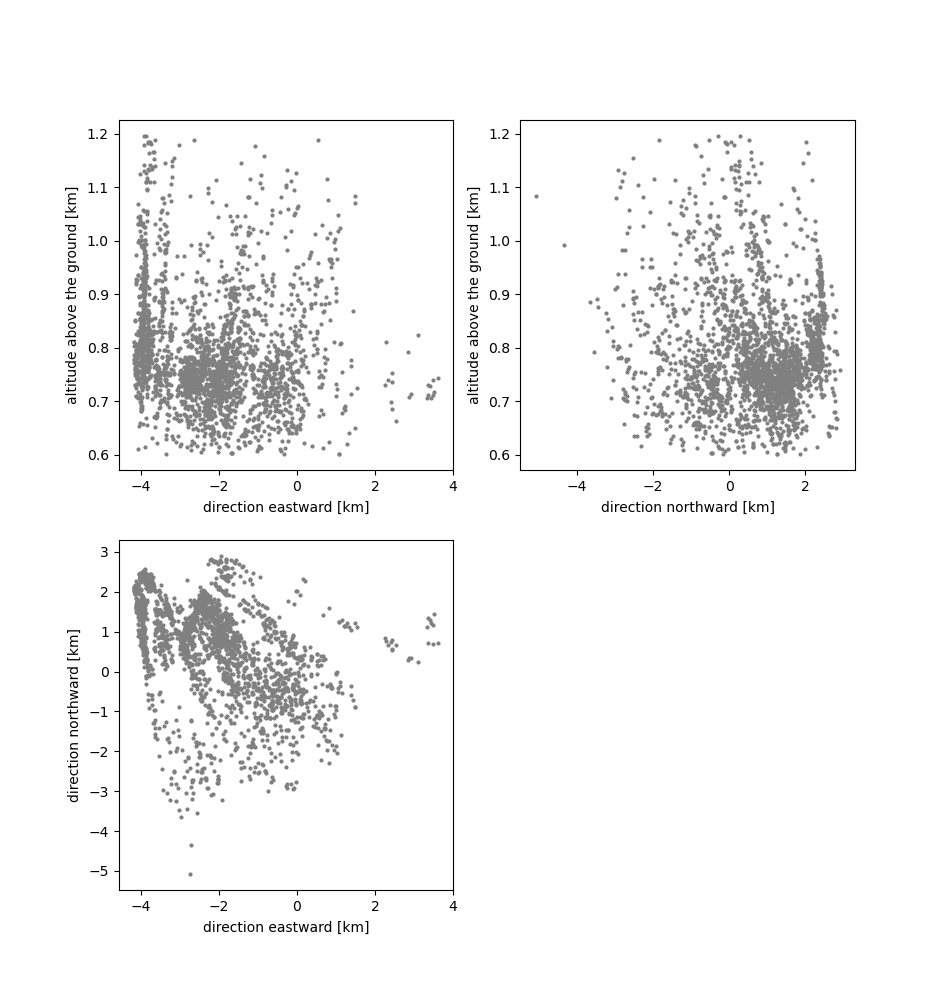

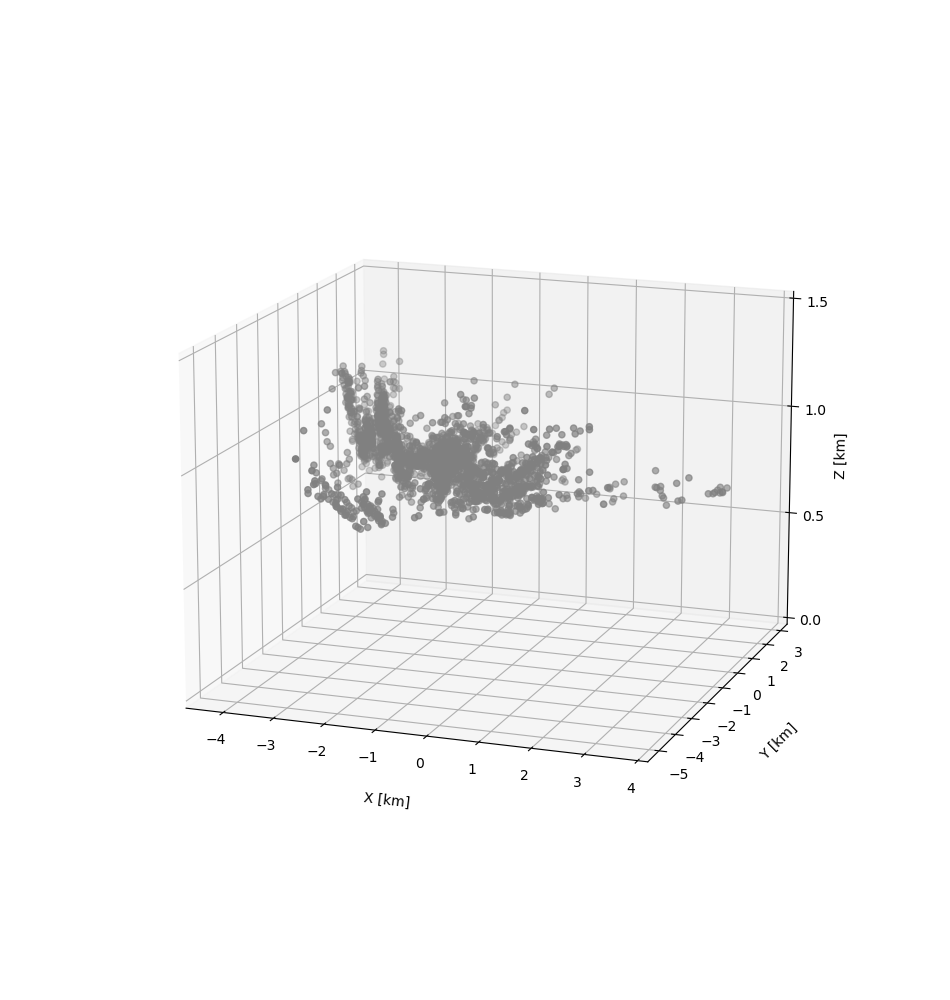

In [11]:
x_slice = np.array(x_relative_var[ind_nonzero])/1000 # convert to km 
y_slice = np.array(y_relative_var[ind_nonzero])/1000
z_slice = np.array(z_relative_var[ind_nonzero])/1000

###2D plot of x,y variables in subplot(2,2,si)
def plot2D(x,y,fig,si,xlabel,ylabel):
    ax = fig.add_subplot(2,2,si)
    ax.scatter(x, y, s=4, marker='o', c= 'gray')
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    ax.xaxis.labelpad = 5
    ax.yaxis.labelpad = 5

###3D plot of x,y,z variables in subplot(2,2,si)
def plot3D(x,y,z,fig,si):
    #check if data point count is sufficient for display
    if (len(x)>10):
        ax = fig.add_subplot(1,1,si, projection='3d')
        x = [x[0:len(x)]]
        y = [y[0:len(y)]]
        z = [z[0:len(z)]]
        x1 = int(min(min(x)))
        x2 = int(max(max(x)))
        y1 = int(min(min(y)))
        y2 = int(max(max(y)))
        z2 = int(max(max(z)))
      
        ax.scatter(x, y, z, c='gray', marker='o')
        # ax.xaxis.set_ticks(np.arange(x1,x2,int((x2-x1+2)/4)+0.5))
        # ax.yaxis.set_ticks(np.arange(y1,y2,int((y2-y1+2)/4)+0.5))
        ax.view_init(elev=15, azim=-70)
        ax.set_xlabel('X [km] ')
        ax.set_ylabel('Y [km] ')
        ax.xaxis.labelpad = 15
        ax.yaxis.labelpad = 15
        ax.zaxis.set_ticks(np.arange(0,int(z2+1),.5))
        ax.set_zlabel('Z [km] ')
        
fig = plt.figure(figsize=(9.5,10))
plot2D(x_slice,z_slice,fig,1,'direction eastward [km]','altitude above the ground [km]')
plot2D(y_slice,z_slice,fig,2,'direction northward [km]','altitude above the ground [km]')
plot2D(x_slice,y_slice,fig,3,'direction eastward [km]','direction northward [km]')
fig = plt.figure(figsize=(9.5,10))
plot3D(x_slice,y_slice,z_slice,fig,1)